In [61]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mplsoccer import Pitch, add_image,FontManager
from PIL import Image
import matplotlib.image as mpimg
from pywaffle import Waffle
from highlight_text import fig_text
from soccerplots.radar_chart import Radar

In [141]:
players = [
    "Spain Pedri",
    "Barca pedri"
]

comp = "liga"
season = "2122"
df_def = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/defense.csv")
df_gs = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/gca.csv")
df_mis = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/misc.csv")
df_pass = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing.csv")
df_ptype = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/passing_types.csv")
df_pos = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/possession.csv")
df_shot = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/shooting.csv")
df_stan = pd.read_csv(f"/work/assets/fbref/leagueStats/{comp}/{season}/standard.csv")
df = pd.concat([df_def, df_gs, df_mis, df_pass, 
                    df_ptype, df_pos, df_shot, df_stan], axis=1)
df = df.loc[:,~df.columns.duplicated()]
df = df.dropna()

dfAll = df

In [184]:
comp = "liga"
season = "2122"
dfs = []
for i in range(9):
    df = pd.read_csv(f"/work/assets/fbref/playerStats/Clpedri{i}.csv")
    dfs.append(df)
df = pd.concat(dfs, axis=1)
df = df.loc[:,~df.columns.duplicated()]
df["Player"] = "Barca Pedri"
# df = df.dropna(axis=1)

In [188]:
df.columns.unique()

Index(['Unnamed: 0', 'Season', 'Age', 'Squad', 'Comp', 'LgRank',
       'MP_Playing Time', 'Starts_Playing Time', 'Min_Playing Time',
       '90s_Playing Time',
       ...
       'Int_Performance', 'TklW_Performance', 'PKwon_Performance',
       'PKcon_Performance', 'OG_Performance', 'Recov_Performance',
       'Won_Aerial Duels', 'Lost_Aerial Duels', 'Won%_Aerial Duels', 'Player'],
      dtype='object', length=191)

In [213]:
df = df[[
     "Player", 
     '90s',
     'SCA90_SCA', 'GCA90_GCA',
     'xA_Per 90 Minutes', 
     'Succ%_Dribbles','Cmp%_Total',
     'TB_Pass Types',
     'Press_Pass Types', 'Sw_Pass Types',
     'KP', 'PPA', '1/3', "Prog"]]
df = df.iloc[:,1:].astype(float)

df.loc[:, ['KP', 'PPA',  '1/3','TB_Pass Types','Press_Pass Types', 'Sw_Pass Types',"Prog"]] = df.loc[:, ['KP', 'PPA', '1/3','TB_Pass Types','Press_Pass Types', 'Sw_Pass Types',"Prog"]].apply(lambda x:x/df["90s"])
df = df.drop(columns=["90s"])

In [ ]:
df = df[[
#     "Player", 
         '90s',
         'SCA90_SCA', 'GCA90_GCA',
         'xA_Per 90 Minutes',
         'Succ%_Dribbles','Cmp%_Total','KP', 'PPA',  '1/3']]

df.loc[:, ['KP', 'PPA',  '1/3']] = df.loc[:, ['KP', 'PPA',  '1/3']].apply(lambda x:x/df["90s"])
df = df.drop(columns=["90s"])

In [147]:
dfAll = dfAll[[
#      '90s',
     'SCA90_SCA', 'GCA90_GCA',
     'xA_Per 90 Minutes', 
     'Succ%_Dribbles','Cmp%_Total',
     'TB_Pass Types',
     'Press_Pass Types', 'Sw_Pass Types',
     'KP', 'PPA', '1/3', "Prog"]]
describer = dfAll.describe()
range_max = describer.loc['75%',:] *1.35
range_min = describer.loc['min',:]
ranges = []
for i in range(len(range_max)):
    _max = range_max[i]
    _min = range_min[i]
    ranges.append((_min, _max))
    
print("ranges :",len(ranges))

ranges : 12


In [33]:
describer = df.describe()
range_max = describer.loc['75%',:] *1.35
range_min = describer.loc['min',:]
ranges = []
for i in range(len(range_max)):
    _max = range_max[i]
    _min = range_min[i]
    ranges.append((_min, _max))
    
print("ranges :",len(ranges))

ranges : 164


In [8]:
df_player = df[(df["Player"]==players[-1])|(df["Player"]==players[0])]
params = df_player.iloc[:,1:].columns.tolist()

print("params :",len(params))
params = [
 'Intercept',
 'Shot Create Act',
 'Goal Create Act',
 'xA',
 'Dribbles Suc %',
 'Pass Suc %',
 'KeyPass',
 'Pass into Pena',
 '1/3']


params : 8


In [150]:

params = [
     'SCA90_SCA', 'GCA90_GCA',
     'xA_Per 90 Minutes', 
     'Succ%_Dribbles','Cmp%_Total',
     'TB_Pass Types',
     'Press_Pass Types', 'Sw_Pass Types',
     'KP', 'PPA', '1/3', "Prog"
]

print("params :",len(params))


# df = df.sort_values(by="1/3", ascending=False)
values = df.iloc[:,1:].values.tolist()

print("values :",len(values[0]))
df

params : 12
values : 12


,Player,SCA90_SCA,GCA90_GCA,xA_Per 90 Minutes,Succ%_Dribbles,Cmp%_Total,TB_Pass Types,Press_Pass Types,Sw_Pass Types,KP,PPA,1/3,Prog
4,Spain Pedri,3.87,0.72,0.16,33.3,91.9,0.571429,10.0,2.571429,1.428571,1.571429,9.714286,6.142857


In [40]:
df_player

,Player,SCA90_SCA,GCA90_GCA,xA_Per 90 Minutes,Succ%_Dribbles,Cmp%_Total,KP,PPA,1/3
346,Pedri,1.79,0.6,0.08,0.0,91.6,0.588235,1.176471,8.823529


In [10]:
df_player = df_player.sort_values(by="1/3", ascending=False)
values = df_player.iloc[:,1:].values.tolist()

print("values :",len(values[0]))
df_player

values : 8


,Player,SCA90_SCA,GCA90_GCA,xA_Per 90 Minutes,Succ%_Dribbles,Cmp%_Total,KP,PPA,1/3
346,Pedri,1.79,0.6,0.08,0.0,91.6,0.588235,1.176471,8.823529


In [153]:
title = dict(
    title_name=players[0].title(),
    title_color='#dddddd',
    subtitle_name='Barcelona20/21',
    subtitle_color='#138CD8',
    title_name_2=players[-1].title(),
    title_color_2='#dddddd',
    subtitle_name_2='Barcelona20/21',
    subtitle_color_2='#D8134B',
    title_fontsize=21,
    subtitle_fontsize=15,
)

endnote = "Data via Fbref.com\n All units are in per90\n created By @Bucciaratimes"

radar = Radar(background_color="#131313",
              patch_color="#131313", 
              label_color="#D8A013",
              range_color="#D8A013",
              label_fontsize=12,
              range_fontsize=8.5,
              fontfamily="serif")

fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, title=title,
                           radar_color=['#138CD8', '#D8134B'], 
                           endnote=endnote, end_size=11.5,
#                            image='/work/assets/image/barcelona.png',
#                            image_coord=[0.495, 0.805, 0.04, 0.1],alpha=.8,
                           compare=True)

# plt.savefig(f'/work/output/barcelona/rader6.png', dpi=500, bbox_inches="tight",facecolor='#131313')

TypeError: plot_radar() missing 1 required positional argument: 'radar_color'

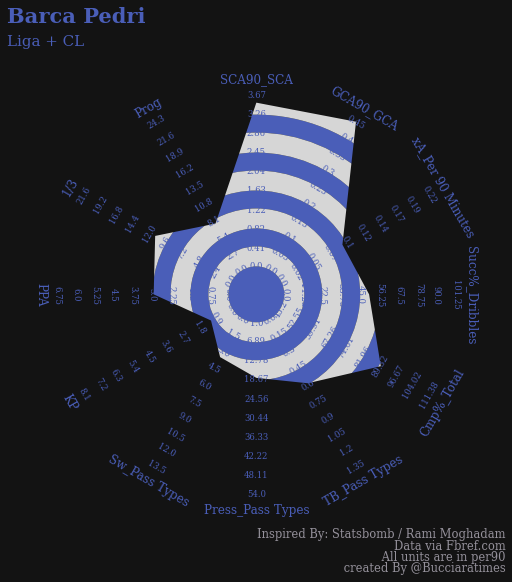

In [231]:
title = dict(
    title_name=players[1].title(),
    title_color='#4A5EB8',
    subtitle_name='Liga + CL',
    subtitle_color='#4A5EB8',
    title_fontsize=21,
    subtitle_fontsize=15,
)

endnote = "Data via Fbref.com\n All units are in per90\n created By @Bucciaratimes"

radar = Radar(background_color="#131313",
              patch_color="#131313", 
              label_color="#4A5EB8",
              range_color="#4A5EB8",
              label_fontsize=12,
              range_fontsize=8.5,
              fontfamily="serif")

fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, title=title,
                           radar_color='#4A5EB8', 
                           endnote=endnote, end_size=11.5,
#                            image='/work/assets/image/barcelona.png',
#                            image_coord=[0.495, 0.805, 0.04, 0.1],alpha=.8,
                           )

plt.savefig(f'/work/output/barcelona/image3.png', dpi=100, bbox_inches="tight",facecolor='#131313')

In [223]:
values

array([3.51000000e+00, 6.00000000e-01, 9.00000000e-02, 6.67000000e+01,
       1.79500000e+02, 5.88235294e-01, 1.82352941e+01, 3.52941176e+00,
       1.17647059e+00, 2.94117647e+00, 1.11764706e+01, 7.64705882e+00])

In [166]:
len(params)

12

In [167]:
len(ranges)

12

In [ ]:
3.510, 6.0, 9.0, 6.67,
1.7950, 5.882, 1.82, 3.52,
1.176, 2.941, 1.1176, 7.64


3.87	0.72	0.16	33.3	
91.9	0.571429	10.0	2.571429	
1.428571	1.571429	9.714286	6.142857